In [1]:
# 處理 array
import numpy as np

# 產生隨機 list，用於隨機產生出一組合法解
import random

# data visualisation and manipulation
# 畫收斂圖
import matplotlib.pyplot as plt

In [2]:
# 15 weights and profits for a knapsack of capacity 750, with an optimal profit of 1458(拿總重749).

# optimal selection of weights.
# s = np.array([1,0,1,0,1,0,1,1,1,0,0,0,0,1,1])

def init():   #讀檔初始化函数

    # the knapsack capacity.
    file = open('p07_c.txt', 'r')
    c = int(file.read())
    file.close()
    
    # the weights of the objects. 
    file = open('p07_w.txt', 'r')
    for line in file.readlines():        
        w.append(int(line))
    file.close

    # the profits of each object.
    file = open('p07_p.txt', 'r')
    for line in file.readlines():        
        p.append(int(line))
    file.close
    
    return c,p,w

In [3]:
# STEP 1 Initial:
# 隨機產生出一組合法解 (至多2的15次方種可能解)

def ramdomSolution():
    # 紀錄物品拿取狀態 不拿:0 拿:1
    item_status = [ random.randint(0,1) for _ in range(n)]
    #item_status = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    total_weight = 0
    is_solution = 0
    profit = 0

    while(is_solution == 0):
        for i in range(n):
            if(item_status[i] == 1):
                total_weight += w[i]
                profit += p[i]

        if(total_weight <= c):
            is_solution = 1
        else: 
            item_status = [ random.randint(0,1) for _ in range(n)]
            total_weight = 0
            profit = 0
            
    return item_status, profit ,total_weight

In [4]:
# STEP 2 Transition: 隨機 / 左右 移動
# 找鄰近解
# 採隨機移動 (1)將任一位置 0換成 1 1換成 0 
# 採左右移動 (2)將任兩不同值位置 0、1對調  

# STEP 3 Evalution: 評估適應值(Fitness value)大小

def getNeighbor(solution, profit, weight):
    
    n = len(solution)
    is_solution = False
    
    neightbor_sol = solution.copy()
    neighbor_profit = profit
    neighbor_weight = weight

    """
    # 採隨機移動 (1)將任一位置 0換成 1 1換成 0 
    while(is_solution is False):
        
        i = random.randint(0,n-1)

        if(neightbor_sol[i] == 0):
            
            neighbor_weight += w[i]

            # 檢查鄰近解是否符合法解(多拿一物品是否超過背包容量)
            if(neighbor_weight <= c):
                neightbor_sol[i]=1
                neighbor_profit += p[i]
                is_solution = True
            else:
                # 不符合合法解，恢復原本重量，重進 while 迴圈取新鄰近解
                neighbor_weight -= w[i]
        else: 
            neightbor_sol[i] = 0
            neighbor_profit -= p[i]
            neighbor_weight -= w[i]
            
            # 少拿一物品必符合和法解，存鄰近合法解
            is_solution = True
    """
         
    # 採左右移動 (2)將任兩不同值位置 0、1對調
    while(is_solution is False):
        
        i = random.randint(0,n-1)
        j = random.randint(0,n-1)
        
        # 找與 solution[i] 不同值的 位置 j
        while(solution[i] == solution[j]):
            j = random.randint(0,n-1)
            
        neightbor_sol = solution.copy()
        neighbor_profit = profit
        neighbor_weight = weight
        
        neightbor_sol[i] = solution[j]
        neightbor_sol[j] = solution[i]

        # 放入 物品 i 拿掉 物品 j
        if(neightbor_sol[i]==1):
            neighbor_profit = neighbor_profit + p[i] - p[j]
            neighbor_weight = neighbor_weight + w[i] - w[j]
        # 放入 物品 j 拿掉 物品 i
        else:
            neighbor_profit = neighbor_profit - p[i] + p[j]
            neighbor_weight = neighbor_weight - w[i] + w[j]

        # 檢查鄰近解是否符合法解(拿一物品放回一物品後，是否超過背包容量)
        if(neighbor_weight <= c):
            is_solution = True
        else:
            # 不符合合法解，恢復原本 解 & 獲利 & 重量 ，重進 while 迴圈取新鄰近解
            neightbor_sol = solution.copy()
            neighbor_profit = profit
            neighbor_weight = weight
 
    return neightbor_sol, neighbor_profit, neighbor_weight
    
#getNeighbor([0,1,1,0],274,143)


In [5]:
# 退火環節:
# 使用退火溫度(T)和適應值的差值(Δf)計算出允許機率，接著隨機一個0–1的浮點數(r)，若該隨機值(r)≤允許機率則進行更新

def simulatedAnnealing(current_sol, currrent_profit, current_weight):
    
    neightbor_sol, neighbor_profit, neighbor_weight = getNeighbor(current_sol, currrent_profit, current_weight)
    print("\n鄰近解: " + str(neightbor_sol))
    print("鄰近解獲利: " + str(neighbor_profit))
    print("鄰近解總重: " + str(neighbor_weight))

    # 鄰近解若優於或等於先前解則更新
    if(currrent_profit <= neighbor_profit):

        current_sol = neightbor_sol
        currrent_profit = neighbor_profit
        current_weight = neighbor_weight

    # 若差於先前解則進行退火環節
    else:

        # 隨機值(r:0~1的浮點數)
        r = random.random()

        # Δf < 0 ，故找最大值為: 鄰近解 - 先前解
        Δf = (neighbor_profit - currrent_profit)
        accept_p = np.exp( (neighbor_profit - currrent_profit) / current_temperature )

        #print("r,accept_p,Δf")
        #print(r,accept_p,Δf)
        #print(min(r,accept_p))

        # 隨機值(r:0~1的浮點數) ≤ 允許機率則進行更新
        # e的指數若是一個很小的負值，計算後的值會較接近1，差值較小的情形能有比較大的機率接受更新
        if(r <= accept_p):
            current_sol = neightbor_sol
            currrent_profit = neighbor_profit
            current_weight = neighbor_weight
            print("接受差值")
    
    return current_sol,currrent_profit,current_weight
    

In [6]:
# main code

# STEP 0 Setting: 初始參數:

global c,w,p,n; 
w=[]
p=[]

c,p,w = init()
print("capacity:",c)
print("profit:",p)
print("weight:",w)

# 15 objects len(w)
n = len(w) 
print("item 數:",n)

# 迭代次數(Iteration)
iteration = 500 

# 初始溫度(T) 退火溫度，一般初始值設為1
current_temperature = 200.0

# 退火係數(Rₜ)
Rₜ = 0.95

# STEP 1 Initial:
# 隨機產生出一組合法解 (至多2的15次方種可能解)
current_sol, currrent_profit, current_weight = ramdomSolution()
print("\n新解: " + str(current_sol))
print("新解獲利: " + str(currrent_profit))
print("新解總重: " + str(current_weight))

# STEP 4 Determination: 將 STEP 3 評估出的適應值與先前的進行比較


profit_history = []

# 迭代 500 次停止
for k in range(iteration):
    
    current_sol, currrent_profit, current_weight = simulatedAnnealing(current_sol, currrent_profit, current_weight)
  
    # 每次迭代的最後皆需進行降溫動作(T = T * Rₜ)，會將溫度T乘上一個小於1的數值(Rₜ)，Rₜ的數值大小取決於想要的收斂速度
    # T (T = T * Rₜ) 會隨著迭代的進行而越來越小，從初始值1開始，隨著迭代不斷下降
    # Δf( Δf = 鄰近解 - 先前解) 除上一個小於1的值(T)，會將 Δf 的值放大，變成一個更大的負數
    # e的指數若是一個很大的負值，計算後的值會很接近 0，成功更新的機率變得更低
    current_temperature = current_temperature * Rₜ
    
    # 紀錄每次迭代的獲利
    profit_history.append(currrent_profit)
    
    print("\n第" + str(k+1) + "輪: ")
    print("解: " + str(current_sol))
    print("解獲利: " + str(currrent_profit))
    print("解總重: " + str(current_weight))

print("\n最後解: " + str(current_sol))
print("最後獲利: " + str(currrent_profit))
print("最後總重: " + str(current_weight)) 
    


capacity: 750
profit: [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]
weight: [70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]
item 數: 15

新解: [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]
新解獲利: 1228
新解總重: 641

鄰近解: [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
鄰近解獲利: 1294
鄰近解總重: 672

第1輪: 
解: [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
解獲利: 1294
解總重: 672

鄰近解: [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]
鄰近解獲利: 1247
鄰近解總重: 649
接受差值

第2輪: 
解: [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]
解獲利: 1247
解總重: 649

鄰近解: [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]
鄰近解獲利: 1308
鄰近解總重: 682

第3輪: 
解: [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]
解獲利: 1308
解總重: 682

鄰近解: [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
鄰近解獲利: 1375
鄰近解總重: 712

第4輪: 
解: [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
解獲利: 1375
解總重: 712

鄰近解: [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]
鄰近解獲利: 1347
鄰近解總重: 700
接受差值

第5輪: 
解: [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]
解獲利

鄰近解總重: 717

第490輪: 
解: [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]
解獲利: 1448
解總重: 750

鄰近解: [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]
鄰近解獲利: 1364
鄰近解總重: 712

第491輪: 
解: [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]
解獲利: 1448
解總重: 750

鄰近解: [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]
鄰近解獲利: 1430
鄰近解總重: 738

第492輪: 
解: [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]
解獲利: 1448
解總重: 750

鄰近解: [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1]
鄰近解獲利: 1420
鄰近解總重: 733

第493輪: 
解: [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]
解獲利: 1448
解總重: 750

鄰近解: [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]
鄰近解獲利: 1394
鄰近解總重: 722

第494輪: 
解: [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]
解獲利: 1448
解總重: 750

鄰近解: [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1]
鄰近解獲利: 1419
鄰近解總重: 733

第495輪: 
解: [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]
解獲利: 1448
解總重: 750

鄰近解: [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0]
鄰近解獲利: 1400
鄰近解總重: 728

第496輪: 
解: [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]
解獲利: 1448
解總重: 750


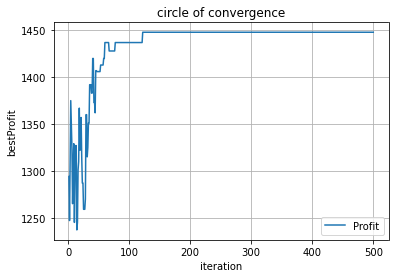

In [7]:
def plotIteration(profit_history, iteration):
    
    iterationTime = iteration

    plt.title('circle of convergence')
    plt.plot(range(1, iterationTime + 1), profit_history, label='Profit')
    plt.xlabel('iteration')
    plt.ylabel('bestProfit')
    plt.legend()
    plt.grid()
    plt.show()
    
# 畫收斂圖
plotIteration(profit_history, iteration)